In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agirish
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | tucumcari
Processing Record 5 of Set 1 | inhambane
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kita
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | biak
Processing Record 23 of S

Processing Record 39 of Set 4 | zhezkazgan
Processing Record 40 of Set 4 | novikovo
Processing Record 41 of Set 4 | oistins
Processing Record 42 of Set 4 | muhos
Processing Record 43 of Set 4 | busselton
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | kyabram
Processing Record 46 of Set 4 | roald
Processing Record 47 of Set 4 | juba
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | hobyo
Processing Record 50 of Set 4 | kushiro
Processing Record 1 of Set 5 | bulembu
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | melfort
Processing Record 5 of Set 5 | san andres
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | cabra
Processing Record 8 of Set 5 | pecos
Processing Record 9 of Set 5 | turukhansk
Processing Record 10 of Set 5 | katsuura
Processing Record 11 of Set 5 | victor harbor
Processing Record 12 of Set 5 | pilao arcado
City

Processing Record 26 of Set 8 | bendigo
Processing Record 27 of Set 8 | sergiyevsk
Processing Record 28 of Set 8 | tual
Processing Record 29 of Set 8 | manuk mangkaw
Processing Record 30 of Set 8 | sorong
Processing Record 31 of Set 8 | bella union
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | omsukchan
Processing Record 34 of Set 8 | kargat
Processing Record 35 of Set 8 | lokken verk
City not found. Skipping...
Processing Record 36 of Set 8 | amderma
City not found. Skipping...
Processing Record 37 of Set 8 | gushikawa
Processing Record 38 of Set 8 | isangel
Processing Record 39 of Set 8 | muncar
Processing Record 40 of Set 8 | zyryanka
Processing Record 41 of Set 8 | faanui
Processing Record 42 of Set 8 | khategaon
Processing Record 43 of Set 8 | billings
Processing Record 44 of Set 8 | sao felix do xingu
Processing Record 45 of Set 8 | hovd
Processing Record 46 of Set 8 | aksarayskiy
Processing Record 47 of Set 8 | hofn
Processing Record 48 of Set 8 

Processing Record 12 of Set 12 | saryg-sep
Processing Record 13 of Set 12 | papasquiaro
City not found. Skipping...
Processing Record 14 of Set 12 | xai-xai
Processing Record 15 of Set 12 | mantua
Processing Record 16 of Set 12 | college
Processing Record 17 of Set 12 | ushtobe
Processing Record 18 of Set 12 | thunder bay
Processing Record 19 of Set 12 | maltahohe
Processing Record 20 of Set 12 | mogzon
Processing Record 21 of Set 12 | monrovia
Processing Record 22 of Set 12 | dawei
Processing Record 23 of Set 12 | cockburn town
Processing Record 24 of Set 12 | alpena
Processing Record 25 of Set 12 | calatayud
Processing Record 26 of Set 12 | anjiang
Processing Record 27 of Set 12 | aksum
Processing Record 28 of Set 12 | kudahuvadhoo
Processing Record 29 of Set 12 | birjand
Processing Record 30 of Set 12 | sterling
Processing Record 31 of Set 12 | toamasina
Processing Record 32 of Set 12 | jalu
Processing Record 33 of Set 12 | wukari
Processing Record 34 of Set 12 | archidona
Processin

In [8]:
len(city_data)

539

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Agirish,61.9247,63.0231,11.73,94,100,8.77,RU,2022-03-12 21:06:34
1,Ahipara,-35.1667,173.1667,71.24,77,99,5.37,NZ,2022-03-12 21:06:34
2,Lorengau,-2.0226,147.2712,82.04,76,100,6.15,PG,2022-03-12 21:06:35
3,Tucumcari,35.1717,-103.7250,59.94,23,0,8.05,US,2022-03-12 21:06:35
4,Inhambane,-23.8650,35.3833,76.06,73,41,6.87,MZ,2022-03-12 21:06:36
5,Mount Gambier,-37.8333,140.7667,54.59,63,0,3.36,AU,2022-03-12 21:02:16
6,Chuy,-33.6971,-53.4616,65.16,62,0,9.40,UY,2022-03-12 21:06:36
7,Te Anau,-45.4167,167.7167,53.55,72,9,0.63,NZ,2022-03-12 21:06:37
8,Port Alfred,-33.5906,26.8910,79.09,77,69,13.65,ZA,2022-03-12 21:06:37
9,Rikitea,-23.1203,-134.9692,79.27,71,77,12.95,PF,2022-03-12 21:06:37


In [10]:
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Agirish,RU,2022-03-12 21:06:34,61.9247,63.0231,11.73,94,100,8.77
1,Ahipara,NZ,2022-03-12 21:06:34,-35.1667,173.1667,71.24,77,99,5.37
2,Lorengau,PG,2022-03-12 21:06:35,-2.0226,147.2712,82.04,76,100,6.15
3,Tucumcari,US,2022-03-12 21:06:35,35.1717,-103.7250,59.94,23,0,8.05
4,Inhambane,MZ,2022-03-12 21:06:36,-23.8650,35.3833,76.06,73,41,6.87
5,Mount Gambier,AU,2022-03-12 21:02:16,-37.8333,140.7667,54.59,63,0,3.36
6,Chuy,UY,2022-03-12 21:06:36,-33.6971,-53.4616,65.16,62,0,9.40
7,Te Anau,NZ,2022-03-12 21:06:37,-45.4167,167.7167,53.55,72,9,0.63
8,Port Alfred,ZA,2022-03-12 21:06:37,-33.5906,26.8910,79.09,77,69,13.65
9,Rikitea,PF,2022-03-12 21:06:37,-23.1203,-134.9692,79.27,71,77,12.95


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

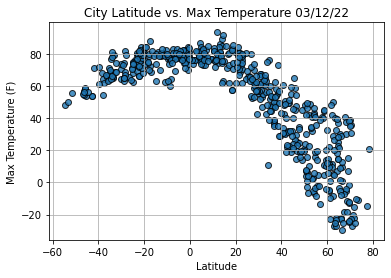

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

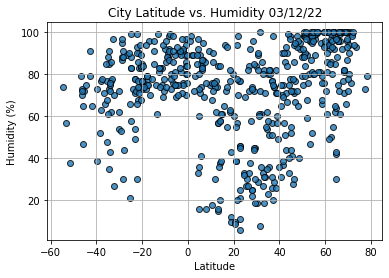

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

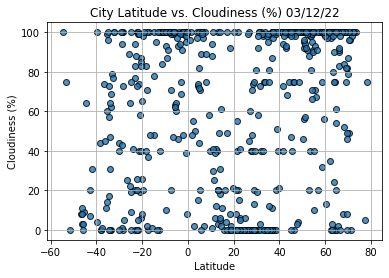

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

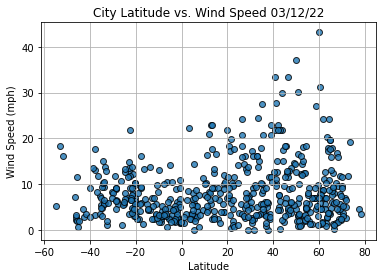

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.text(1.05,0.4, f"r = {r_value}", transform=plt.gcf().transFigure)
    plt.text(1.05,0.5, line_eq, transform=plt.gcf().transFigure)
    # Annotate the text for the line equation.
    #plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
index13 = city_data_df.loc[13]
index13

City                  New Norfolk
Country                        AU
Date          2022-03-12 21:06:39
Lat                      -42.7826
Lng                      147.0587
Max Temp                    53.71
Humidity                       79
Cloudiness                      7
Wind Speed                   2.91
Name: 13, dtype: object

In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Agirish,RU,2022-03-12 21:06:34,61.9247,63.0231,11.73,94,100,8.77
3,Tucumcari,US,2022-03-12 21:06:35,35.1717,-103.7250,59.94,23,0,8.05
10,Kita,ML,2022-03-12 21:06:38,13.0349,-9.4895,86.14,15,3,5.70
12,Iqaluit,CA,2022-03-12 21:06:39,63.7506,-68.5145,-21.95,92,24,2.53
16,Faya,SA,2022-03-12 21:06:40,18.3851,42.4509,57.72,62,8,3.89


In [78]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

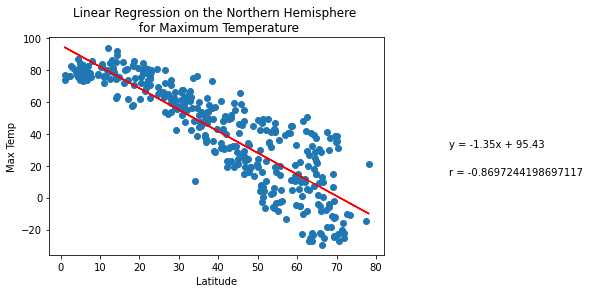

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

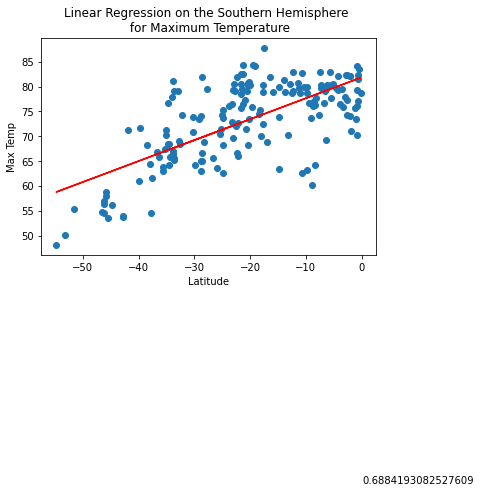

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

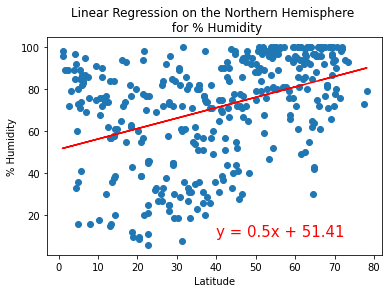

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

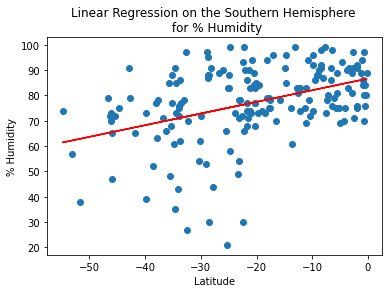

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

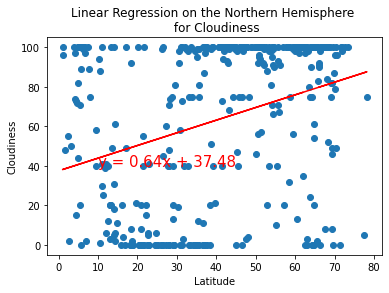

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(10,40))

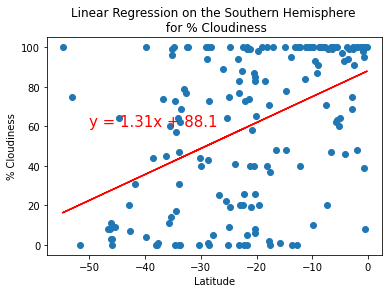

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

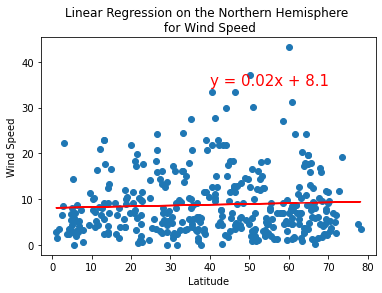

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

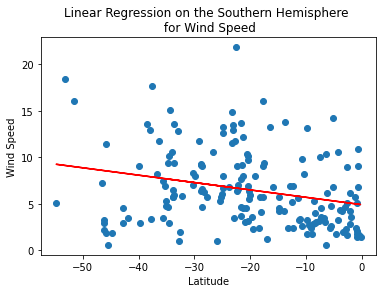

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))